In [109]:
import bz2
import csv
import io
import re
import random
from collections.abc import Generator
import os
from lxml import etree
from tqdm import tqdm

import numpy as np
import pandas as pd
from nltk.corpus import words
import wiki_dump

import warnings
warnings.filterwarnings('ignore')

In [18]:
from dask.distributed import Client

client = Client(n_workers=6, threads_per_worker=2)  # Adjust based on your CPU
client

C:\Users\Cheng\anaconda3\lib\site-packages\distributed\node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63643 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:63643/status,
Dashboard: http://127.0.0.1:63643/status,Workers: 6
Total threads: 12,Total memory: 31.84 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:63644,Workers: 6
Dashboard: http://127.0.0.1:63643/status,Total threads: 12
Started: Just now,Total memory: 31.84 GiB
Comm: tcp://127.0.0.1:63683,Total threads: 2
Dashboard: http://127.0.0.1:63690/status,Memory: 5.31 GiB
Nanny: tcp://127.0.0.1:63647,


In [19]:
import apriori_chunked
import pickle
#%time apriori_chunked.apriori_disk('data/combined.csv',1000)
#%time apriori_chunked.apriori_disk('data/output_5.csv',40000)
#%time apriori_chunked.apriori_disk('data/articles_items.csv_worker_0.csv',500)

In [20]:
# Replace with the path to your index and dump files
index_file_path = 'data/wiki.xml.bz2' #enwiki-latest-pages-articles-multistream-index.txt.bz2'
offsets_file_path = 'data/offsets.txt'
dump_file_path = 'data/enwiki-latest-pages-articles-multistream.xml.bz2'
output_csv_path = 'data/articles_items.csv'
data = "data/Market_Basket_Optimisation.csv"

In [25]:
import apriori_general_v0 as ap

In [66]:
frequent_itemsets = ap.apriori_disk(data,[None,{'\n'},{''}],0.05,500)
frequent_itemsets

no rows:  7501
Frequent Itemsets Level 2 completed


{frozenset({'shrimp'}): 536,
 frozenset({'low fat yogurt'}): 574,
 frozenset({'green tea'}): 991,
 frozenset({'mineral water'}): 1788,
 frozenset({'frozen smoothie'}): 475,
 frozenset({'burgers'}): 654,
 frozenset({'eggs'}): 1348,
 frozenset({'turkey'}): 469,
 frozenset({'milk'}): 972,
 frozenset({'whole wheat rice'}): 439,
 frozenset({'french fries'}): 1282,
 frozenset({'soup'}): 379,
 frozenset({'frozen vegetables'}): 715,
 frozenset({'spaghetti'}): 1306,
 frozenset({'cookies'}): 603,
 frozenset({'cooking oil'}): 383,
 frozenset({'chocolate'}): 1230,
 frozenset({'chicken'}): 450,
 frozenset({'tomatoes'}): 513,
 frozenset({'pancakes'}): 713,
 frozenset({'grated cheese'}): 393,
 frozenset({'ground beef'}): 737,
 frozenset({'escalope'}): 595,
 frozenset({'cake'}): 608,
 frozenset({'olive oil'}): 493,
 frozenset({'eggs', 'mineral water'}): 382,
 frozenset({'mineral water', 'spaghetti'}): 448,
 frozenset({'chocolate', 'mineral water'}): 395}

In [67]:
frequent_itemsets = ap.apriori_disk(data,[None,{'\n'},{''}],0.025,500)
frequent_itemsets

no rows:  7501
Frequent Itemsets Level 2 completed


{frozenset({'shrimp'}): 536,
 frozenset({'avocado'}): 250,
 frozenset({'vegetables mix'}): 193,
 frozenset({'cottage cheese'}): 239,
 frozenset({'energy drink'}): 200,
 frozenset({'tomato juice'}): 228,
 frozenset({'low fat yogurt'}): 574,
 frozenset({'green tea'}): 991,
 frozenset({'honey'}): 356,
 frozenset({'mineral water'}): 1788,
 frozenset({'salmon'}): 319,
 frozenset({'frozen smoothie'}): 475,
 frozenset({'burgers'}): 654,
 frozenset({'eggs'}): 1348,
 frozenset({'turkey'}): 469,
 frozenset({'milk'}): 972,
 frozenset({'energy bar'}): 203,
 frozenset({'whole wheat rice'}): 439,
 frozenset({'whole wheat pasta'}): 221,
 frozenset({'french fries'}): 1282,
 frozenset({'soup'}): 379,
 frozenset({'frozen vegetables'}): 715,
 frozenset({'spaghetti'}): 1306,
 frozenset({'cookies'}): 603,
 frozenset({'cooking oil'}): 383,
 frozenset({'champagne'}): 351,
 frozenset({'chocolate'}): 1230,
 frozenset({'chicken'}): 450,
 frozenset({'tomatoes'}): 513,
 frozenset({'red wine'}): 211,
 frozenset({'

In [68]:
frequent_itemsets = ap.apriori_disk(data,[None,{'\n'},{''}],0.01,500)
frequent_itemsets

no rows:  7501
Frequent Itemsets Level 2 completed
Frequent Itemsets Level 3 completed


{frozenset({'shrimp'}): 536,
 frozenset({'almonds'}): 153,
 frozenset({'avocado'}): 250,
 frozenset({'vegetables mix'}): 193,
 frozenset({'yams'}): 86,
 frozenset({'cottage cheese'}): 239,
 frozenset({'energy drink'}): 200,
 frozenset({'tomato juice'}): 228,
 frozenset({'low fat yogurt'}): 574,
 frozenset({'green tea'}): 991,
 frozenset({'honey'}): 356,
 frozenset({'mineral water'}): 1788,
 frozenset({'salmon'}): 319,
 frozenset({'frozen smoothie'}): 475,
 frozenset({'burgers'}): 654,
 frozenset({'meatballs'}): 157,
 frozenset({'eggs'}): 1348,
 frozenset({'turkey'}): 469,
 frozenset({'milk'}): 972,
 frozenset({'energy bar'}): 203,
 frozenset({'whole wheat rice'}): 439,
 frozenset({'whole wheat pasta'}): 221,
 frozenset({'french fries'}): 1282,
 frozenset({'soup'}): 379,
 frozenset({'light cream'}): 117,
 frozenset({'frozen vegetables'}): 715,
 frozenset({'spaghetti'}): 1306,
 frozenset({'cookies'}): 603,
 frozenset({'cooking oil'}): 383,
 frozenset({'champagne'}): 351,
 frozenset({'cho

In [69]:
frequent_itemsets = ap.apriori_disk(data,[None,{'\n'},{''}],0.005,500)
frequent_itemsets

no rows:  7501
Frequent Itemsets Level 2 completed
Frequent Itemsets Level 3 completed


{frozenset({'shrimp'}): 536,
 frozenset({'almonds'}): 153,
 frozenset({'avocado'}): 250,
 frozenset({'vegetables mix'}): 193,
 frozenset({'green grapes'}): 68,
 frozenset({'whole weat flour'}): 70,
 frozenset({'yams'}): 86,
 frozenset({'cottage cheese'}): 239,
 frozenset({'energy drink'}): 200,
 frozenset({'tomato juice'}): 228,
 frozenset({'low fat yogurt'}): 574,
 frozenset({'green tea'}): 991,
 frozenset({'honey'}): 356,
 frozenset({'mineral water'}): 1788,
 frozenset({'salmon'}): 319,
 frozenset({'antioxydant juice'}): 67,
 frozenset({'frozen smoothie'}): 475,
 frozenset({'spinach'}): 53,
 frozenset({'burgers'}): 654,
 frozenset({'meatballs'}): 157,
 frozenset({'eggs'}): 1348,
 frozenset({'turkey'}): 469,
 frozenset({'milk'}): 972,
 frozenset({'energy bar'}): 203,
 frozenset({'whole wheat rice'}): 439,
 frozenset({'whole wheat pasta'}): 221,
 frozenset({'french fries'}): 1282,
 frozenset({'soup'}): 379,
 frozenset({'light cream'}): 117,
 frozenset({'shallot'}): 58,
 frozenset({'fro

In [70]:
freq_list = list(frequent_itemsets.keys())
itemset_features = ap.check_itemsets(data, freq_list, "40MB")

In [71]:
itemset_features
len(itemset_features)

7501

In [72]:
with open('data/itemset_features.pkl', 'wb') as f:
            pickle.dump(itemset_features, f)

In [73]:
import clustering

In [107]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv("data/Market_Basket_Optimisation.csv")
all_transactions = df.apply(lambda x: x.tolist(), axis=1).tolist()

#print(all_transactions)


In [110]:
unique_items = {item for itemset in frequent_itemsets for item in itemset}
print(unique_items)
# Initialize MultiLabelBinarizer with the unique items obtained from global_frequent_itemsets
mlb = MultiLabelBinarizer(classes=sorted(unique_items))

# Prepare the binary matrix for the given transactions
binary_matrix = mlb.fit_transform(all_transactions)
#print(binary_matrix[23])

{'vegetables mix', 'shallot', 'gums', 'light mayo', 'light cream', 'pasta', 'cookies', 'zucchini', 'antioxydant juice', 'parmesan cheese', 'energy drink', 'bacon', 'shrimp', 'eggs', 'barbecue sauce', 'chili', 'cooking oil', 'soup', 'fromage blanc', 'frozen vegetables', 'grated cheese', 'milk', 'hot dogs', 'french fries', 'avocado', 'candy bars', 'strong cheese', 'olive oil', 'ground beef', 'rice', 'sparkling water', 'eggplant', 'mineral water', 'green tea', 'melons', 'honey', 'white wine', 'herb & pepper', 'fresh bread', 'whole wheat rice', 'pickles', 'nonfat milk', 'butter', 'mayonnaise', 'oil', 'whole weat flour', 'almonds', 'mint green tea', 'gluten free bar', 'strawberries', 'turkey', 'burgers', 'meatballs', 'body spray', 'tomato juice', 'bug spray', 'mint', 'muffins', 'red wine', 'brownies', 'carrots', 'magazines', 'blueberries', 'ham', 'french wine', 'salt', 'chicken', 'yogurt cake', 'pet food', 'frozen smoothie', 'green beans', 'clothes accessories', 'yams', 'chocolate', 'mushro

In [76]:
len(binary_matrix)

7500

In [80]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [81]:
pca = PCA(2)
reduced_data_2 = pca.fit_transform(binary_matrix)
print(reduced_data_2)

[[-0.18664683  0.46376373]
 [-0.48087666 -0.23943279]
 [-0.3764072  -0.16671849]
 ...
 [-0.38394892 -0.21029658]
 [-0.44015881 -0.04148443]
 [-0.18117228  0.33884656]]


In [82]:
pca = PCA(3)
reduced_data_3 = pca.fit_transform(binary_matrix)
print(reduced_data_3)

[[-0.18663016  0.46204251 -0.71777158]
 [-0.48085715 -0.23912675 -0.01035419]
 [-0.37629519 -0.16660106 -0.02224967]
 ...
 [-0.3839781  -0.20941109  0.01009217]
 [-0.43996335 -0.04558348  0.15548427]
 [-0.18136115  0.34332284 -0.6451576 ]]


In [83]:
#for i in reduced_data_2:
#    print(i[0])

x = [i[0] for i in reduced_data_2]
y = [i[1] for i in reduced_data_2]
print(x,y)

[-0.18664682888615197, -0.48087666205542007, -0.3764072012796266, 0.5546923641442714, -0.42548265406006947, -0.44758666194077584, -0.3626956416324196, 0.15903676077043488, -0.4876734347674787, -0.2975299271666385, -0.5904587182266096, 0.589223906344815, -0.20013091193828703, 0.2294795183173735, 0.16273505514988754, 0.17886035251710247, -0.2305476623820705, 1.1606047716225323, -0.13242720319495857, 0.11896339457865342, -0.45305348208935015, 0.8004387866301012, -0.13429524054392283, -0.30141755859307956, 0.3809019725530289, 1.218521098208239, -0.47825838733089904, 0.681377247234975, 0.7567783957689879, -0.3408902862181829, 0.6248458449122152, -0.41629823334298305, -0.0374737441004329, -0.5904587182266096, -0.022113837670975793, -0.4813142524443897, 0.4244464145091357, 0.2585323259437015, -0.44452815440241117, -0.07524897837597368, 0.943189311584667, -0.07524897837597368, -0.3464407210355901, -0.4931465913495601, -0.128500281567753, 0.3017248377318199, 0.17172206942328352, -0.452335490475

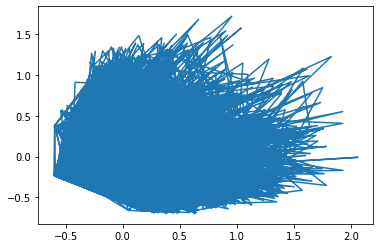

In [84]:
plt.plot(x,y) 
plt.show()

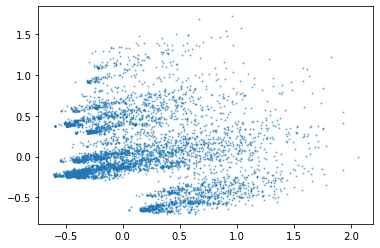

In [85]:
plt.scatter(x, y, s=1, alpha=0.5)
plt.show()

In [90]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

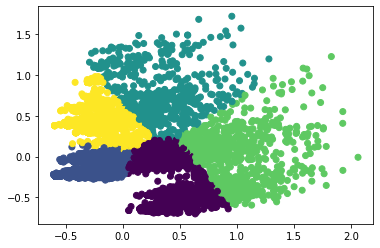

In [89]:
data = list(zip(x, y))
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

In [91]:
clustering = DBSCAN(eps=3, min_samples=2).fit(data)
clustering.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
clustering

DBSCAN(eps=3, min_samples=2)

In [105]:
db = DBSCAN(eps=0.05, min_samples=10).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 9
Estimated number of noise points: 640


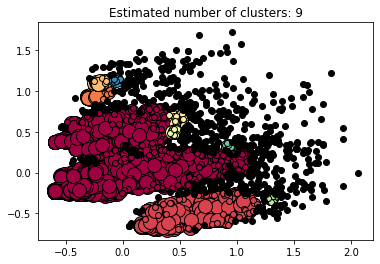

In [106]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = reduced_data_2[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = reduced_data_2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()